In [1]:
import mysql.connector
import pandas as pd
# Connect to MySQL
connection = mysql.connector.connect(
    host="localhost",       # Replace with your host (e.g., "127.0.0.1")
    user="root",   #  MySQL username
    password="1234", #  MySQL password
    database="project1" 
)

# Check connection
if connection.is_connected():
    print("Connected to MySQL!")

Connected to MySQL!


In [2]:
cursor = connection.cursor()
# Query the data from walmart data sale
cursor.execute("SELECT * FROM dataset1")
#After fetching data from the database we are storing it into Pandas DataFrame
dataset1 = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(dataset1.head(5))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [7]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

db = mysql.connector.connect( host = "localhost",
                             username = "root",
                             password = "1234",
                             database = "project1"
                            )
cursor = db.cursor()

In [9]:
print(dataset1.tail(5))

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
9689    9990  CA-2014-110422  1/21/2014  1/23/2014    Second Class   
9690    9991  CA-2017-121258  2/26/2017   3/3/2017  Standard Class   
9691    9992  CA-2017-121258  2/26/2017   3/3/2017  Standard Class   
9692    9993  CA-2017-121258  2/26/2017   3/3/2017  Standard Class   
9693    9994  CA-2017-119914   5/4/2017   5/9/2017    Second Class   

     Customer ID     Customer Name   Segment        Country         City  ...  \
9689    TB-21400  Tom Boeckenhauer  Consumer  United States        Miami  ...   
9690    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9691    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9692    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9693    CC-12220      Chris Cortes  Consumer  United States  Westminster  ...   

     Postal Code  Region       Product ID         Category Sub-Category  \
9689       33180 

In [11]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9694 entries, 0 to 9693
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9694 non-null   int64  
 1   Order ID       9694 non-null   object 
 2   Order Date     9694 non-null   object 
 3   Ship Date      9694 non-null   object 
 4   Ship Mode      9694 non-null   object 
 5   Customer ID    9694 non-null   object 
 6   Customer Name  9694 non-null   object 
 7   Segment        9694 non-null   object 
 8   Country        9694 non-null   object 
 9   City           9694 non-null   object 
 10  State          9694 non-null   object 
 11  Postal Code    9694 non-null   int64  
 12  Region         9694 non-null   object 
 13  Product ID     9694 non-null   object 
 14  Category       9694 non-null   object 
 15  Sub-Category   9694 non-null   object 
 16  Product Name   9694 non-null   object 
 17  Sales          9694 non-null   float64
 18  Quantity

In [12]:
#counting all null values
dataset1.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
dataset1.shape

(9694, 21)

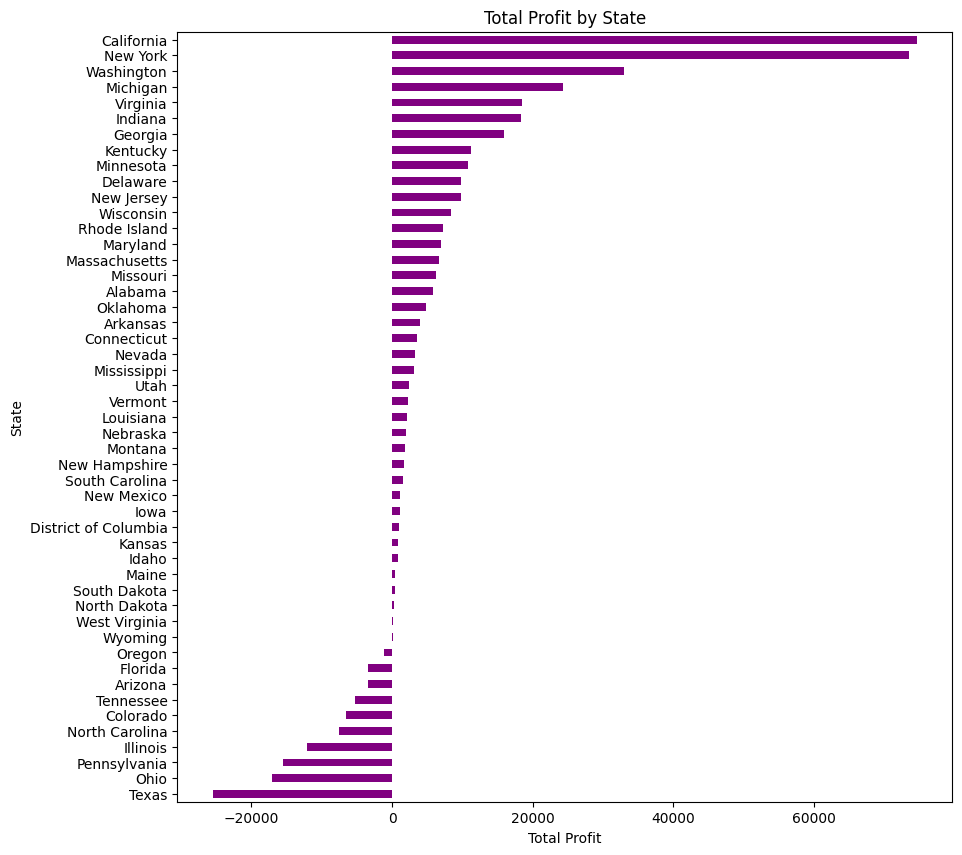

In [18]:
#What is the total profit by state?
import pandas as pd
import matplotlib.pyplot as plt

state_profit = dataset1.groupby("State")["Profit"].sum().sort_values()

plt.figure(figsize=(10,10))
state_profit.plot(kind="barh", color="purple")
plt.xlabel("Total Profit")
plt.ylabel("State")
plt.title("Total Profit by State")
plt.show()


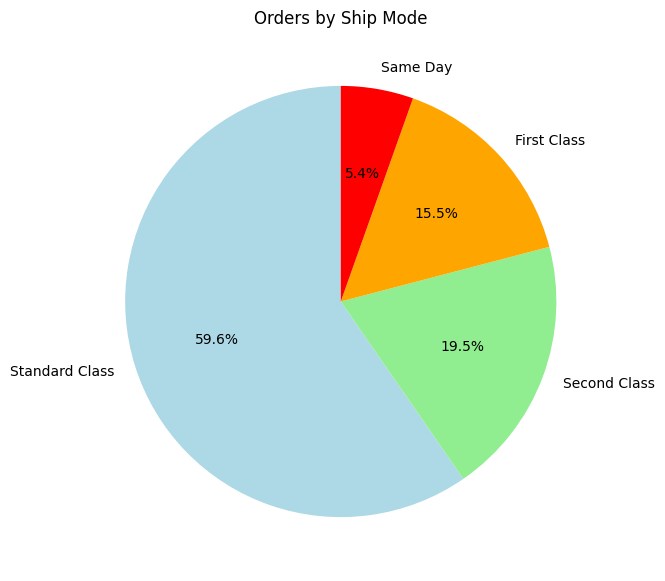

In [19]:
#What is the number of orders by ship mode? 
ship_mode_counts = dataset1["Ship Mode"].value_counts()

plt.figure(figsize=(7,7))
ship_mode_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["lightblue", "lightgreen", "orange", "red"])
plt.title("Orders by Ship Mode")
plt.ylabel("")
plt.show()


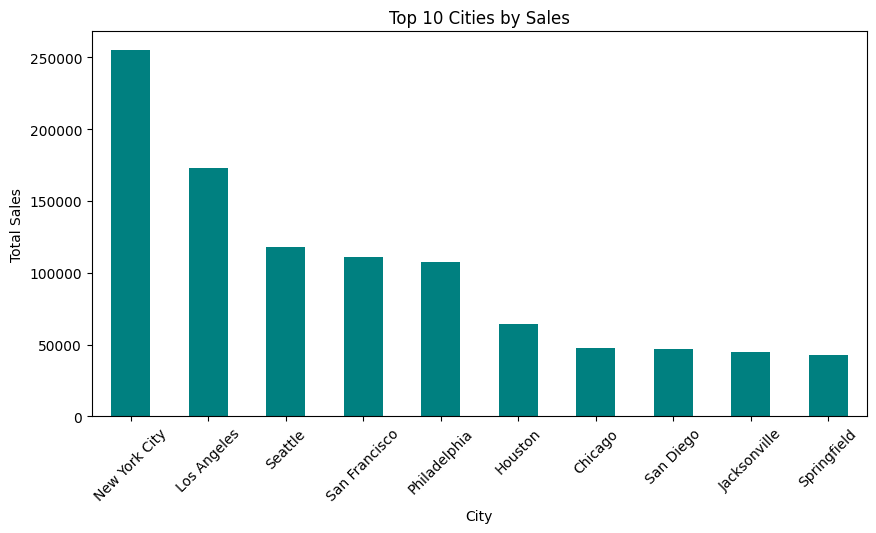

In [20]:
#What are the top 10 cities by sales? 
city_sales = dataset1.groupby("City")["Sales"].sum().nlargest(10)

plt.figure(figsize=(10,5))
city_sales.plot(kind="bar", color="teal")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("Top 10 Cities by Sales")
plt.xticks(rotation=45)
plt.show()


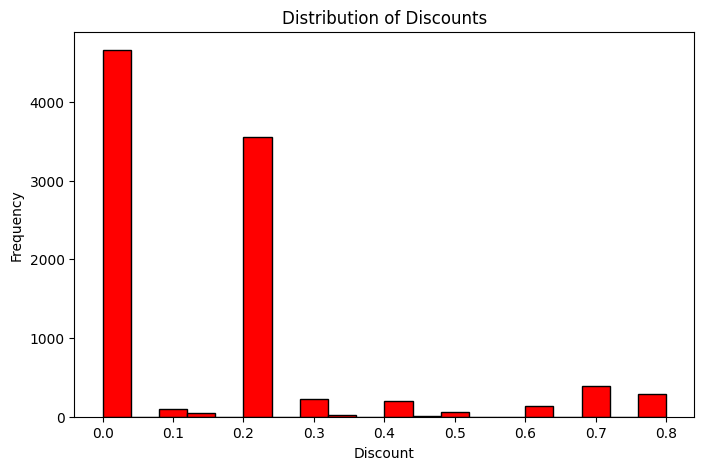

In [21]:
#What is the distribution of discounts given? (Histogram)
plt.figure(figsize=(8,5))
plt.hist(dataset1["Discount"], bins=20, color="red", edgecolor="black")
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.title("Distribution of Discounts")
plt.show()


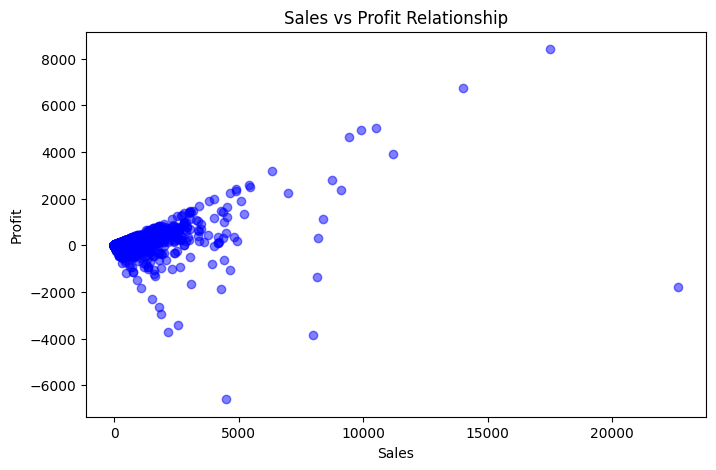

In [23]:
#What is the relationship between sales and profit? (Scatter Plot)
plt.figure(figsize=(8,5))
plt.scatter(dataset1["Sales"], dataset1["Profit"], alpha=0.5, color="blue")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit Relationship")
plt.show()


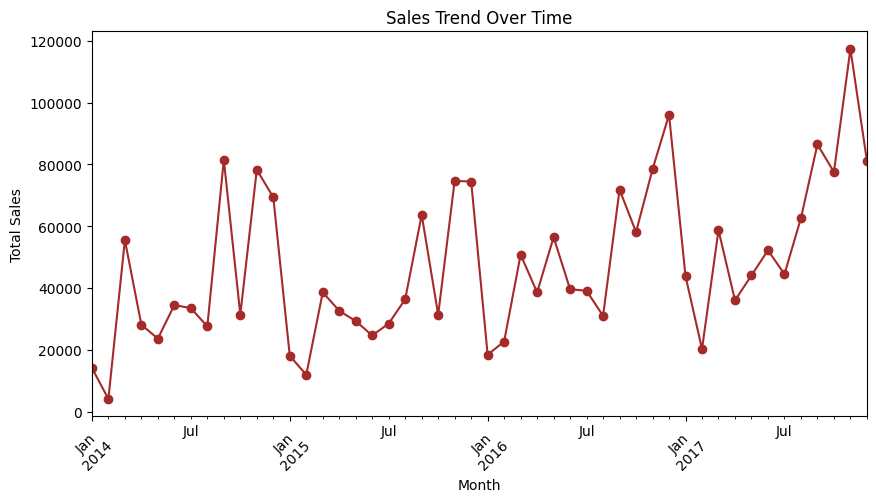

In [26]:
# What is the sales trend over time? (Line Chart)
dataset1["Order Date"] = pd.to_datetime(dataset1["Order Date"])
sales_trend = dataset1.groupby(dataset1["Order Date"].dt.to_period("M"))["Sales"].sum()

plt.figure(figsize=(10,5))
sales_trend.plot(kind="line", marker="o", color="brown")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_17740\1538520491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_quantity.index, y=subcategory_quantity.values, palette="coolwarm")


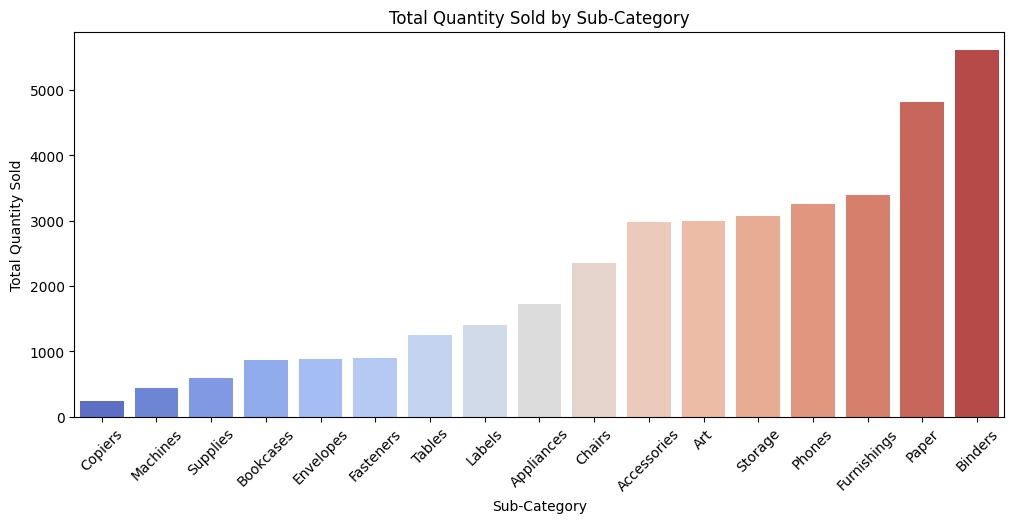

In [37]:
#What is the total quantity sold by sub-category? (Bar Chart )
import seaborn as sns

subcategory_quantity = dataset1.groupby("Sub-Category")["Quantity"].sum().sort_values()
plt.figure(figsize=(12,5))
sns.barplot(x=subcategory_quantity.index, y=subcategory_quantity.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Sub-Category")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity Sold by Sub-Category")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_17740\2783688965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Discount", data=dataset1, palette="Set2")


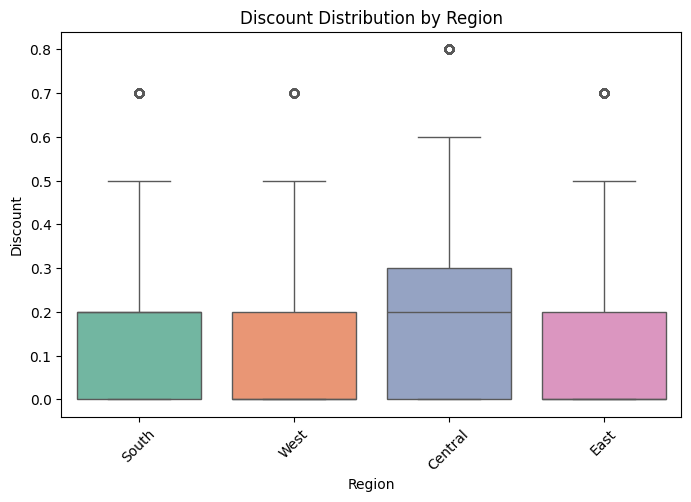

In [38]:
#What is the average discount per region? (Box Plot)
plt.figure(figsize=(8,5))
sns.boxplot(x="Region", y="Discount", data=dataset1, palette="Set2")
plt.xlabel("Region")
plt.ylabel("Discount")
plt.title("Discount Distribution by Region")
plt.xticks(rotation=45)
plt.show()


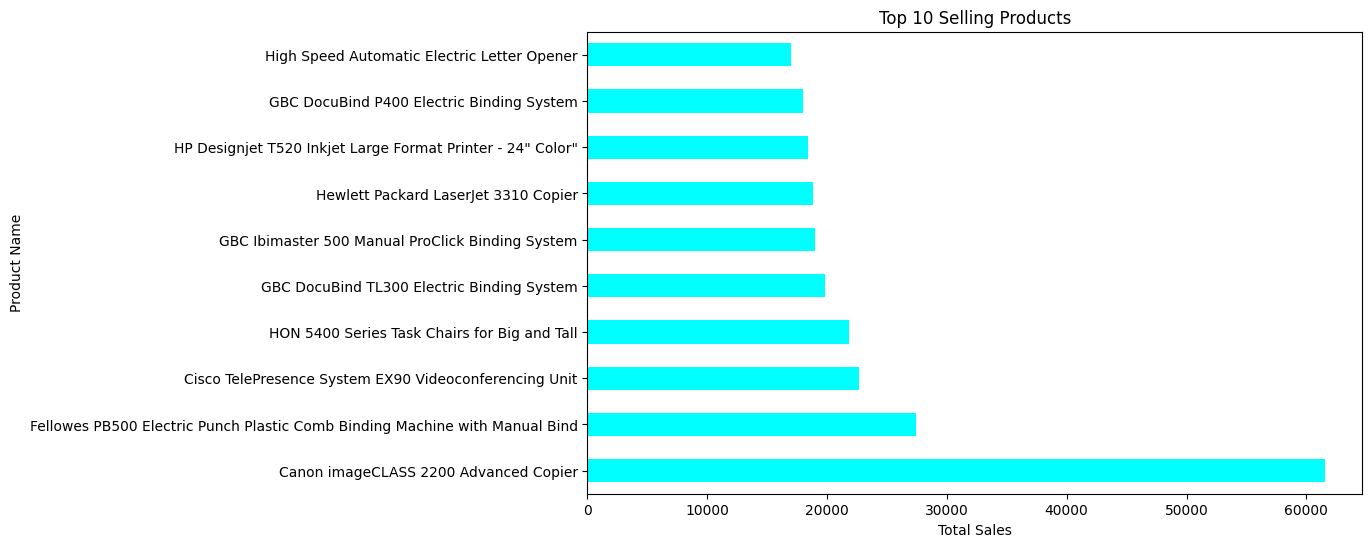

In [39]:
#What are the top-selling products? (Horizontal Bar Chart)
top_products = dataset1.groupby("Product Name")["Sales"].sum().nlargest(10)

plt.figure(figsize=(10,6))
top_products.plot(kind="barh", color="cyan")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 10 Selling Products")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17740\3842511128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Segment", y="Sales", data=dataset1, estimator=sum, palette="viridis")


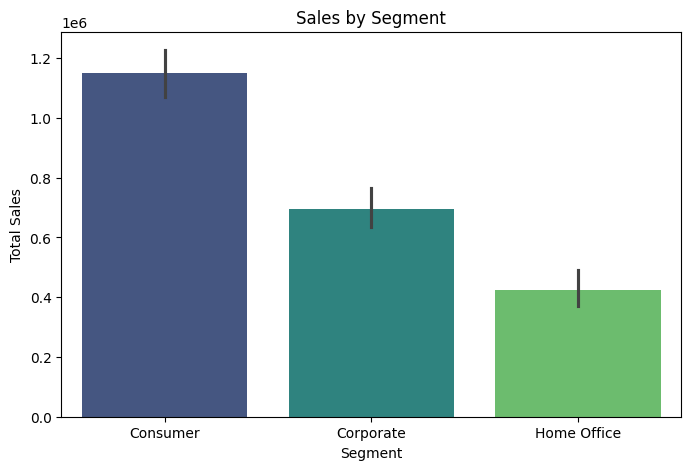

In [40]:
#How do sales vary by segment? (Bar Chart with Seaborn)
plt.figure(figsize=(8,5))
sns.barplot(x="Segment", y="Sales", data=dataset1, estimator=sum, palette="viridis")
plt.xlabel("Segment")
plt.ylabel("Total Sales")
plt.title("Sales by Segment")
plt.show()


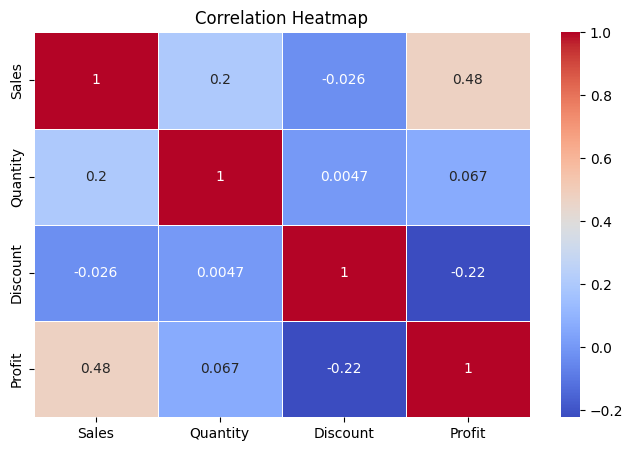

In [41]:
#What is the correlation between numerical variables?
plt.figure(figsize=(8,5))
sns.heatmap(dataset1[["Sales", "Quantity", "Discount", "Profit"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
